<a href="https://colab.research.google.com/github/Rhizling/Python-Projects/blob/main/Malaria_Infected_Cells_Identification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

**Welcome!**

Hey, there! Welcome to your first project at BigTh!nk AI. You're going to build your own AI! There's some reading to do along the way, but it's going to be fun and worth it at the end!

**Making a Copy**

**Log into this file using your UMD email account!** This file is intended to be modified only **after** being copied! 

1. Go to "File" at the top left.
2. Select "Save a copy in Drive".
3. Open that copy, it should be in a new tab with the title "Copy of BigTh!nk AI Project 1 Fall 2021". Rename this to anything you want!
4. Share your copy with your group members using "Share" at the top right.
5. Move the colab file under your respective group's folder in the BigTh!nk shared drive in Fall 2021/Projects/Team X Colab files, where X is your group number. (For individuals, you'll see your name on the folder).

**Asking For Help**

During this whole thing, if you need any help at all, ping us on the BigTh!nk Discord server's #pyoneers channel with @AI Lead, @Python Lead, or @DS Lead. We'll be right with you.

**Runtime Instructions**

Remember, this environment divides all your code into cells.

1. Connect to a Google server, top right. Wait for it to say "Connected".
2. Go to "Runtime", top left. Select "Change runtime type" and set it to GPU.
3. Click the `[ ]` on the left of each code cell to run it. Or just hit "Runtime" and select "Restart and run all" if you need.

**Note:** If you run a cell, but modify something in a cell above it, then to avoid errors, you have to rerun every cell from and including the cell you modified.

**Note:** If your syntax and tensor dimensions are correct but you're still getting an error, go to "Runtime" at the top left of this Colab and select "Restart and run all".

**Google Drive Instructions**

This will help us save your work.

1. In the cell below, enter your group number in the `GROUP_NUMBER` variable, and run it. If you are an individual, enter the number we assigned you on the sign-up sheet next to your name.
2. You will see a link starting with `https://accounts.google.com`. Click it. 
3. Log in using your UMD email account (on which you have the BigTh!nk AI Shared Drive). 
4. Click "Allow".
5. Copy the displayed code into the box here under the code cell saying `Enter your authorization code:`, and press Enter.

## Previous coding exercises and slides

You might find these helpful

First Neural Net: https://colab.research.google.com/drive/1f-8IuR1O5pC6VdHgrmj3YMWCwihI5aoV?usp=sharing

Image classification: https://colab.research.google.com/drive/1vz9niuT0KO1kLW7FzGi6i9qcBCM2N-Nv?usp=sharing

Python practice: https://colab.research.google.com/drive/1pdqma3msfR55cKm2mg3znTdbKRAudOsG?usp=sharing

Data Sci: https://colab.research.google.com/drive/1OeOtP5oMqJwgkw8UbUHdFdC-h5rKSQAx?usp=sharing

OpenCV: https://colab.research.google.com/drive/1NUiyc3kn-zzuRyOjdLUj4fjk-rSkX60s?usp=sharing

Link to all previous meeting slides: https://drive.google.com/drive/u/3/folders/1lWL8gBs4PwNyVuQrzvFCmcGa_4ETtK5Y 



In [ ]:
# Write your group's number below!
GROUP_NUMBER = 8

from google.colab import drive # ADD TEXT ABOVE
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Here are some libraries you'll see very often in machine learning and deep learning. Remember, importing TensorFlow implicitly imports Keras! Go ahead and run this cell below with the imports.

In [ ]:
import tensorflow as tf # our favorite framework for machine learning!
# Note that keras is imported by default, so we'll often call tf.keras.<command>

import math
import numpy as np # the fundamental building block of ML: arrays!
import matplotlib.pyplot as plt # this will help us plot and visualize our data
import logging
import seaborn as sns # this will help us in understanding performance metrics towards the end

!pip install -U tensorflow_datasets # we're getting the repository of datasets that this project's dataset belongs to

import tensorflow_datasets as tfds 
tfds.disable_progress_bar()

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

# 2. The Problem

**Issue**

It's 2051 and there's a new malaria outbreak! People in Yew Nork City are shivering in fever and chills! It's up to you, the AI engineers at BigTh!nk BioTech (established after the famous coronavirus pandemic of 2020) to speed up diagnoses.

With patients storming hospitals, we need a way to make testing incredibly rapid and accurate - and the current methods are far too slow. We need you, and we need the power of AI.

**Task**

Your job is to make a model that can learn from previous images to identify a malaria-infected cell. By the end of this project, given an image of a cell, your model's prediction must be one of two outputs:

0: Uninfected

1: Parasitized

**Supervised Learning**

Remember, a supervised learning AI will look at many input examples (images), look at what the output actually was (labels) for those input examples, and then try to figure out what the link is. 

Once it learns that, it will try to predict the output of an unseen, previously unknown input datapoint (a new image).




 3. The Raw Data

The hospitals of Yew Nork City have compiled 27,558 cell images from thin blood smear slide images. If you're not sure what that is, don't worry! It's just a way to take pictures of microscopic cells. These pictures are what you'll train your algorithm on to identify which ones are parasitized.

Go ahead and run these code cells below to load the dataset and divide it into a training dataset, `train_ds`, and a test dataset, `test_ds`.

Note that this dataset is only made up of one "split" called "train" on tensorflow. A "split" is basically how a dataset is distributed. The fashion MNIST dataset had two splits called "train" and "test" which made our job easier for us. 

The syntax to slice part of the split is as follows: `train[:num%]` or `train[num%:]`. Look at [this](https://stackoverflow.com/questions/509211/understanding-slice-notation) resource for help on slicing in Python

You can choose any split ratio you think is good.

There are some additional parameters here that you have to think about setting for this particular problem.

In [ ]:
# Start coding here!

# We will use these variables for visualization of the dataset later.
ds, info = tfds.load('malaria', split = 'train', shuffle_files = False, with_info = True)

# We will use these variables for actually training the model.
train_ds, test_ds = tfds.load(
  'malaria',
  split = ['train[:65%]','train[35%:]'],
  shuffle_files = False, as_supervised = True,
)

We want to know exactly how many images are in each of our two datasets! Fill in the blanks appropriately to get this number and then print it out. 

In [ ]:
NUM_TRAIN_IMAGES = tf.data.experimental.cardinality(train_ds).numpy()


NUM_TEST_IMAGES = tf.data.experimental.cardinality(test_ds).numpy()


Running this cell below will show you some examples of raw, unprocessed images of our patients' cells and their labels:

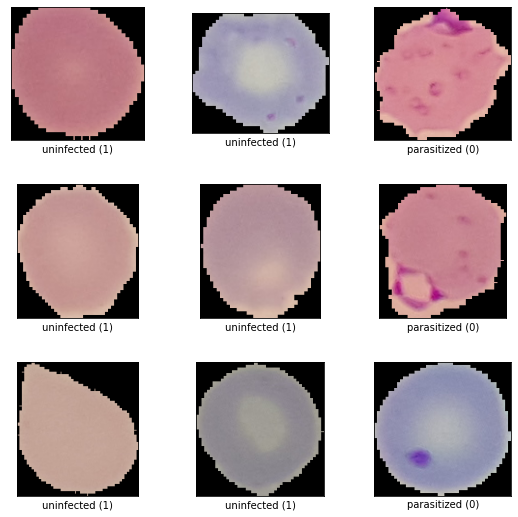

In [ ]:
vis = tfds.visualization.show_examples(ds, info)

Go take another look at the labels of the images above. The labels in this raw dataset are unintuitive: currently, the labels are:

0: parasitized

1: uninfected

"*A tragedy! Not intuitive at all! Where is the concern?*" - unknown source

We're going to invert these in **4. Processing the Data**, so that the labels will *later* be:

0: uninfected

1: parasitized

If you take yet another look at the pictures above, you might notice the images aren't evenly sized.

Running the cell below can show you an example of what we mean by uneven image size.

If the output is something like:

`Image size: (140, 120, 3)`

it just means the image is 140 x 120 pixels, and the 3 tells you how many color channels are in the image. There are 3 here, which are red, green, and blue (RGB). Pixel stuff.

In [ ]:
for image, label in train_ds.take(2):
    print("Image size: ", image.numpy().shape)
    print("Label: ", label.numpy())

Image size:  (103, 103, 3)
Label:  1
Image size:  (106, 121, 3)
Label:  1


# 4. Processing the Data

If you're supposed to build an AI to learn well from these images, you need some cleaner data! It makes it easier on whatever model you build to learn. 

This cell defines a couple of standard constants we want, as well as 3 functions we've written to clean the data. It'll call those functions on `train_ds` and `test_ds` to create `clean_train_ds` and `clean_test_ds`.

The functions here, however, are incomplete. Fill in the blanks using what we know! Remember the goal is to:

1. Resize images to 200 by 200 pixels 

2. Invert the labels

[This](https://www.tensorflow.org/api_docs/python/tf/image/resize_with_crop_or_pad) documentation might be useful for Step 1 :)

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = [200, 200]


# DO NOT MODIFY THIS FUNCTION
def convert(image, label):
  image = tf.image.convert_image_dtype(image, tf.float32)
  return image, label


# resizing each image to 200 x 200
def pad(image,label): 
  image,label = convert(image, label)
  image = tf.image.resize_with_crop_or_pad(image,200,200)
  return image, label

# switching the 0 and 1 around, as mentioned
def invert_labels(image, label):

  # Think of a way to modify the label variable. It should be converted to 0 if it's 1 and vice versa.
  if label == 1:
    label = 0
  else:
    label = 1

  # UNCOMMENT LINE BELOW
  return image, label


# DO NOT MODIFY CODE BELOW
clean_train_ds = (
    train_ds
    .map(pad)
    .map(invert_labels)
)

clean_test_ds = (
    test_ds
    .map(pad)
    .map(invert_labels)
) 

# 5. The Clean Data

Run this cell below and look how clean these examples are! All the cell pictures have been padded and fit into images that are 200 x 200 pixels. These are ready to be read by your model.

As you might have noticed in the cell above, the names of the clean training and testing datasets are `clean_train_ds` and `clean_test_ds`. We're going to use Matplotlib to visualize our changes to the data.

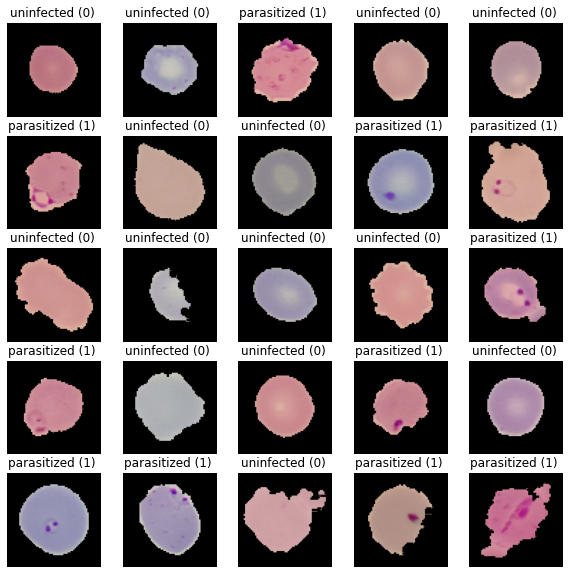

In [ ]:
image_batch, label_batch = next(iter(clean_train_ds.batch(BATCH_SIZE)))

def show_batch(image_batch, label_batch):
    plt.figure(figsize = (10, 10))
    for n in range(25):
        ax = plt.subplot(5, 5, n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("parasitized (1) ")
        else:
            plt.title("uninfected (0) ")
        plt.axis("off")
show_batch(image_batch.numpy(), label_batch.numpy())

Looks like the labels are indeed fixed! 0 now means uninfected, and 1 now means parasitized.

Don't worry about this little cell below, just run it. We're just getting the data in batches to be sent to the model for training and testing.

In [ ]:
clean_train_ds = clean_train_ds.repeat().shuffle(NUM_TRAIN_IMAGES).batch(BATCH_SIZE)
clean_test_ds = clean_test_ds.batch(BATCH_SIZE)

# 6. The Model

Phew! We're finally here. Your job is to create and optimize a machine learning model to identify malaria in a cell. As a re-statement: the model should produce 0 on an uninfected cell image and 1 on a parasitized cell image.

**Convolutional Neural Networks (CNNs)**

To detect malaria, we need some way to *see* the cells! In computer vision, this is commonly achieved through CNNs. A flashlight in the dark, seeing part by part until it pieces the picture together.

We're writing the convolutional part of the network. **Don't change it!** 

**Dense (Hidden) Layers**

Write your part of the model under `# BUILD YOUR PART HERE`. Remember that we are dealing with image data and need to construct the layers accordingly. Think back to the exercises!
`model.summary()` will give you a good idea of your finished network.

**Output**

Think about how many neurons and which activation function you need for this layer. Remember, this problem is a binary classification problem (only two outputs, 0 or 1) and we discussed the output layer for these problems in meetings!

**Hyperparameters**

Remember, *parameters* are what the model adjusts by itself. *Hyperparameters* are what *you* can build and adjust in the model to maximize performance. In this project, you're free to change any or all of the following:



*   Depth of neural network (number of dense layers except output)
*   Width of neural network (number of neurons per dense layer except output)
*   Activation function of each dense layer (except output)

You *can* also change the following, but we'll get to these two in **7. Compiling the Model**.

*   Optimization algorithm
*   Learning rate



Go save Yew Nork City!

No pressure.

In [ ]:
model = tf.keras.Sequential([
                             
    # CNN: this is the convolutional part of the neural network, we got this
    # DO NOT MODIFY THE CNN

    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = tf.nn.relu, input_shape = (200, 200, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides = 2),

    # BUILD YOUR PART HERE (Dense and output layers):
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='tanh'),
    tf.keras.layers.Dense(128,activation='tanh'),
    tf.keras.layers.Dense(64,activation='tanh'),
    tf.keras.layers.Dense(64,activation='tanh'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
   

])

model.summary() # this is going to print a quick little summary of our model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 80000)             0         
                                                                 
 dense_15 (Dense)            (None, 256)              

# 7. Compiling the Model

There are three parts to this function: `optimizer`, `loss` function, and `metrics`. We're going to explain them all.

**Optimizer**

You are free to set an optimizer you think works best! You can find a list of [Keras optimizers here](https://keras.io/api/optimizers/) if you scroll down to the "Available Optimizers" heading.

Remember, setting an optimizer can be done either by passing a string, like 

`optimizer = 'RMSProp'`

or by calling a function from `tf.keras`. For example, 

`optimizer = tf.keras.optimizers.RMSProp()`. 

We recommend the latter, since you can set `learning_rate` as a parameter of the function, like 

`optimizer = tf.keras.optimizers.RMSProp(learning_rate = 0.1)`

(Hint: don't just settle for RMSProp!)

**Note:** If you do not explicitly set a `learning_rate` value, it'll go by the default value listed in the documentation. Default `learning_rate` values can be found on that optimizer's documentation ([click here](https://keras.io/api/optimizers/)).

**Loss function**

The model should use the `BinaryCrossentropy()` loss function, commonly used in binary classifiers. The model adjusts its parameters (weights and biases) to minimize this loss. **Don't change this!**

Remember, the lower the loss, the better!

**Metrics**

Loss is fine to understand if the model is learning. But in the real world, a common way to test is called the **confusion matrix**. We'll get to this in **9. Performance on Test Data**, but basically, it has four metrics we calculate, given by the bullets below. And you can check this link for all possible [performance metrics on Keras](https://keras.io/api/metrics/). 
Here are the metrics that will help us measure your models' performance.

*   `TruePositives` (guess correct, guessed 1)
*   `TrueNegatives` (guess correct, guessed 0)
*   `FalsePositives` (guess wrong, guessed 1)
*   `FalseNegatives` (guess wrong, guessed 0)

In order to get these values from our model, add the following to the metrics array that you pass in: `tf.keras.metrics.TruePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.FalseNegatives()`

In [ ]:

Optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
Loss = tf.keras.losses.BinaryCrossentropy()
model.compile(optimizer=Optimizer,loss=Loss,metrics=[tf.keras.metrics.TruePositives(),tf.keras.metrics.TrueNegatives(),tf.keras.metrics.FalsePositives(),tf.keras.metrics.FalseNegatives()])

# 8. Training

**Epochs and Batches**

When you read a chapter in a book, that's basically a *batch*. When you read the book end to end once, that's basically an *epoch*. 

The same way, when a model reads a group of (in this case) 32 examples, it's a batch. That's `BATCH_SIZE = 32`, which we defined at the start of **4. Processing the Data**. When a model reads through all of the training examples once, it's an epoch. That's `NUMBER_OF_EPOCHS = 5` here, meaning 5 epochs. **Don't change `NUMBER_OF_EPOCHS`!**

`steps_per_epoch` is just a calculation of how many batches there are per epoch.

**Beginning Training**

Use the appropriate function from Keras which will begin to train the model and tweak its parameters (weights and biases). In addition to passing in your clean training set, you also have to set the number of epochs, and the steps_ per_epoch (number of training images divided by batch size).

Run this cell below to begin the actual training process for the model. You will see a progress bar, followed by the `loss` value and the number of `true_positives`, `true_negatives`, `false_negatives`, and `false_positives` in that epoch.

Training can take around 3-4 minutes on the GPU setting.

In [ ]:
NUMBER_OF_EPOCHS = 5
BATCH_SIZE = 32
steps = math.ceil(NUM_TRAIN_IMAGES/BATCH_SIZE)
model.fit(clean_train_ds, epochs= NUMBER_OF_EPOCHS, batch_size= BATCH_SIZE, steps_per_epoch= steps)


Epoch 1/5
560/560 [==============================] - 98s 104ms/step - loss: 0.7103 - true_positives_5: 4194.0000 - true_negatives_5: 4806.0000 - false_positives_3: 4190.0000 - false_negatives_5: 4730.0000
Epoch 2/5
560/560 [==============================] - 60s 108ms/step - loss: 0.7070 - true_positives_5: 4394.0000 - true_negatives_5: 4586.0000 - false_positives_3: 4406.0000 - false_negatives_5: 4534.0000
Epoch 3/5
560/560 [==============================] - 59s 106ms/step - loss: 0.7015 - true_positives_5: 4570.0000 - true_negatives_5: 4521.0000 - false_positives_3: 4454.0000 - false_negatives_5: 4375.0000
Epoch 4/5
560/560 [==============================] - 59s 106ms/step - loss: 0.7073 - true_positives_5: 4632.0000 - true_negatives_5: 4432.0000 - false_positives_3: 4488.0000 - false_negatives_5: 4368.0000
Epoch 5/5
560/560 [==============================] - 59s 106ms/step - loss: 0.7056 - true_positives_5: 4443.0000 - true_negatives_5: 4508.0000 - false_positives_3: 4517.0000 - fals

Great! You were able to train your model! 

**Saving the Model**

After 5 epochs, your model has tuned its weights and biases in a certain configuration. To save that model in the BigTh!nk AI shared drive, just run the cell below. Don't edit it.

In [ ]:
model.save("/content/drive/Shared drives/BigTh!nk AI/Fall 2021/Projects/F21 Models/%s.h5" % GROUP_NUMBER)

# 9. Performance on Test Data

Loss is fine, but it doesn't show us the whole picture. And looking at the confusion matrix as numbers doesn't *show* us what's going on. So we're going to actually calculate the accuracy of your model from a visualized confusion matrix!

To do that, first we need to test your model on data that it hasn't yet seen or trained on. Remember when we split the dataset into `train_ds` and `test_ds`? We're testing on the cleaned version of `test_ds` which we named `clean_test_ds`. Test data is also called *unseen data*.

**Beginning Testing**

Run your model on the test data with this cell below.


In [ ]:
test_loss, test_tp, test_tn, test_fp, test_fn = model.evaluate(clean_test_ds, steps = math.ceil(NUM_TEST_IMAGES/BATCH_SIZE))

560/560 [==============================] - 32s 56ms/step - loss: 0.6940 - true_positives_5: 0.0000e+00 - true_negatives_5: 8958.0000 - false_positives_3: 0.0000e+00 - false_negatives_5: 8955.0000


Using the Seaborn library we imported, we're going to draw the confusion matrix for your model to assess its performance on the test data!

Run these 2 cells to build the confusion matrix.

In [ ]:
def draw_confusion_matrix(tp, tn, fp, fn):
  cf_matrix = np.array([[tp, fp], [fn, tn]])
  group_names = ['True Pos','False Pos','False Neg','True Neg']
  group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = 'Blues', xticklabels = False, yticklabels = False)

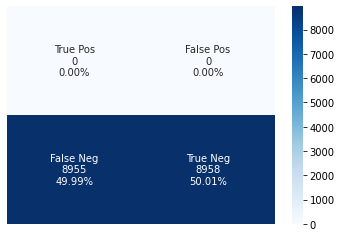

In [ ]:
draw_confusion_matrix(test_tp, test_tn, test_fp, test_fn)

Now, we can actually calculate the accuracy from the confusion matrix. Remember,

**Accuracy = (Total Trues) / (Total Predictions)**

Run the cell below to see the accuracy of your model on the test data!

In [ ]:
accuracy = (test_tp + test_tn) / (test_tp + test_tn + test_fp + test_fn)

print("The accuracy of your model is %.7f, or about %d%%." % (accuracy, round(accuracy*100)))
if (accuracy > 0.9):
  print("Great job! Your high-accuracy AI is about to save Yew Nork City in style.")
elif (accuracy > 0.8):
  print("Not bad! Your model is going to do a pretty good job of helping Yew Nork City.")
else:
  print("Good effort, but Yew Nork City needs a slightly more reliable model in order to diagnose patients accurately.")

The accuracy of your model is 0.5000837, or about 50%.
Good effort, but Yew Nork City needs a slightly more reliable model in order to diagnose patients accurately.


# 10. Good job!

Well, you did it. If your model did better than 80%, BigTh!nk's AI engineers really mean business. Yew Nork City is eternally indebted to your service to its ailing civilians!

If you couldn't quite manage 80%, no worries. You can always make a copy of this project and tweak even more things to optimize your model even more. Go ahead and disable the cell where you saved your model, right above **9. Performance on Test Data**, to make infinite tweaks privately without overwriting your group's model. 

You can also go through the specific data processing functions in detail, if you'd like. 

Here are some documentation links if you want to learn more about the libraries, functions, and tools you (knowingly or unknowingly) used in this project!

*   [Malaria Dataset](https://www.tensorflow.org/datasets/catalog/malaria)
*   [TensorFlow](https://www.tensorflow.org/guide)
*   [Keras](https://keras.io/api/)
*   [Seaborn](https://seaborn.pydata.org/)
*   [Numpy](https://numpy.org/)
*   [Matplotlib](https://matplotlib.org/)